# Chapter 4: Testing and regularization with Turi Create

In [1]:
!git clone https://github.com/luisguiserrano/manning.git
%cd  manning/Chapter_4_Testing_Overfitting_Underfitting
!pip install turicreate

Cloning into 'manning'...
remote: Enumerating objects: 737, done.
remote: Counting objects: 100% (544/544), done.
remote: Compressing objects: 100% (365/365), done.
remote: Total 737 (delta 296), reused 402 (delta 164), pack-reused 193
Receiving objects: 100% (737/737), 50.93 MiB | 21.44 MiB/s, done.
Resolving deltas: 100% (363/363), done.
/content/manning/Chapter_4_Testing_Overfitting_Underfitting
     |████████████████████████████████| 92.0MB 46kB/s 
     |████████████████████████████████| 3.6MB 28.8MB/s 
     |████████████████████████████████| 327kB 37.2MB/s 
     |████████████████████████████████| 3.5MB 6.9MB/s 
     |████████████████████████████████| 86.4MB 53kB/s 
     |████████████████████████████████| 18.3MB 261kB/s 
     |████████████████████████████████| 51kB 7.8MB/s 
     |████████████████████████████████| 3.8MB 26.3MB/s 
     |████████████████████████████████| 450kB 30.2MB/s 
  Created wheel for resampy: filename=resampy-0.2.1-cp37-none-any.whl size=320845 sha256=fb41f670a8

In [2]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
random.seed(0)

## Defining our dataset

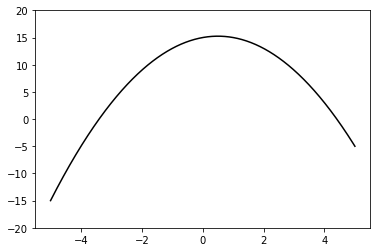

In [3]:
# Our original polynomial is -x^2+x+15
coefs = [15,1,-1]

def polynomial(coefs, x):
    n = len(coefs)
    return sum([coefs[i]*x**i for i in range(n)])

def draw_polynomial(coefs):
    n = len(coefs)
    x = np.linspace(-5, 5, 1000)
    plt.ylim(-20,20)
    plt.plot(x, sum([coefs[i]*x**i for i in range(n)]), linestyle='-', color='black')

draw_polynomial(coefs)

In [4]:
X = []
Y = []
for i in range(40):
    x = random.uniform(-5,5)
    y = polynomial(coefs, x) + random.gauss(0,2)
    X.append(x)
    Y.append(y)

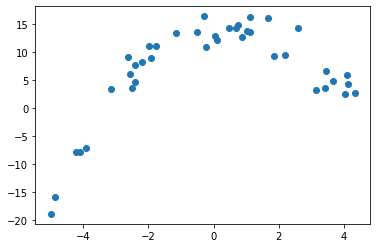

In [5]:
plt.scatter(X, Y)
#draw_polynomial(coefs)

## Training a polynomial regression model

In [6]:
import turicreate as tc

In [7]:
data = tc.SFrame({'x':X, 'y':Y})
data

x,y
3.4442185152504816,6.685961311021467
-2.4108324970703663,4.690236225597948
0.11274721368608542,12.205789026637378
-1.9668727392107255,11.133217991032268
-0.23403045847644144,10.927272159051856
0.046868558173902564,12.8584762866286
-2.1816215560029617,8.16012255928749
-2.4949365863755943,3.5061587527226514
4.097462559682402,5.933186396721837
4.021659504395828,2.454299054753137


### Adding columns to our dataset corresponding to $x^2, x^3, \ldots, x^{200}$

In [8]:
for i in range(2,200):
    string = 'x^'+str(i)
    data[string] = data['x'].apply(lambda x:x**i)
data

x,y,x^2,x^3,x^4
3.4442185152504816,6.685961311021467,11.862641180794233,40.85752839466433,140.72225578427518
-2.4108324970703663,4.690236225597948,5.812113328930538,-14.012031690041567,33.78066134833202
0.11274721368608542,12.205789026637378,0.012711934193975809,0.0014332351609316464,0.00016159327095197139
-1.9668727392107255,11.133217991032268,3.8685883722503025,-7.609021008606714,14.965975993910245
-0.23403045847644144,10.927272159051856,0.05477025549469338,-0.012817908004294928,0.0029997808869539904
0.046868558173902564,12.8584762866286,0.002196661745300489,0.0001029543687980023,4.82532282326659e-06
-2.1816215560029617,8.16012255928749,4.759472613616784,-10.38336804907213,22.652579559768178
-2.4949365863755943,3.5061587527226514,6.224708570035504,-15.530253150907287,38.74699678187344
4.097462559682402,5.933186396721837,16.789199427999062,68.79311606326735,281.877217433124
4.021659504395828,2.454299054753137,16.173745169297295,65.04529598178058,261.5900328013676


## Splitting data into training and testing

In [9]:
train, test = data.random_split(.8, seed=0)

In [10]:
def display_results(model):
    coefs = model.coefficients
    print("Training error (rmse):", model.evaluate(train)['rmse'])
    print("Testing error (rmse):", model.evaluate(test)['rmse'])
    plt.scatter(train['x'], train['y'], marker='o')
    plt.scatter(test['x'], test['y'], marker='^')
    draw_polynomial(coefs['value'])
    plt.show()
    print("Polynomial coefficients")
    print(coefs['name', 'value'])

## Training a polynomial regression model with no regularization

In [11]:
model_no_reg = tc.linear_regression.create(
    train, target='y', l1_penalty=0.0, l2_penalty=0.0, verbose=False, validation_set=None)

Training error (rmse): 0.9773283539506342
Testing error (rmse): 15.912144146843525


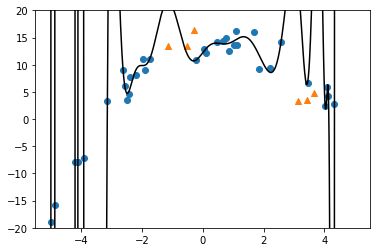

Polynomial coefficients
+-------------+---------------------+
|     name    |        value        |
+-------------+---------------------+
| (intercept) |  12.208931624656543 |
|      x      |  7.338371925834938  |
|     x^2     |  -1.009719929894946 |
|     x^3     |  -25.58088861212472 |
|     x^4     |  19.22814473344504  |
|     x^5     |  20.935671268153904 |
|     x^6     | -19.312564024964047 |
|     x^7     | -6.6943357384892375 |
|     x^8     |  7.868441557431117  |
|     x^9     |  0.7440621059060603 |
+-------------+---------------------+
[200 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [12]:
display_results(model_no_reg)

## Training a polynomial regression model with L1 regularization

In [13]:
model_L1_reg = tc.linear_regression.create(
    train, target='y', l1_penalty=0.1, l2_penalty=0.0, verbose=False, validation_set=None)

Training error (rmse): 9.473874911154354
Testing error (rmse): 10.077027617091748


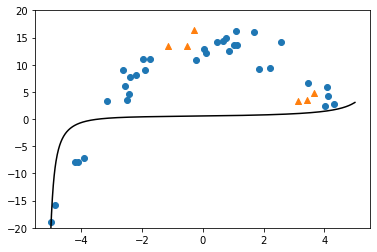

Polynomial coefficients
+-------------+-------------------------+
|     name    |          value          |
+-------------+-------------------------+
| (intercept) |    0.5655798426406277   |
|      x      |   0.06940816365046576   |
|     x^2     |   0.007552836827385347  |
|     x^3     |   0.003947237269580271  |
|     x^4     | -0.00021279451431743305 |
|     x^5     |  0.0001904801779238345  |
|     x^6     | -1.7985140462517314e-05 |
|     x^7     |  7.880814935063952e-06  |
|     x^8     |  -8.895545466589715e-07 |
|     x^9     |  3.020651102542037e-07  |
+-------------+-------------------------+
[200 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [14]:
display_results(model_L1_reg)

## Training a polynomial regression model with L2 regularization

In [15]:
model_L2_reg = tc.linear_regression.create(
    train, target='y', l1_penalty=0.0, l2_penalty=0.1, verbose=False, validation_set=None)

Training error (rmse): 1.7146736386897217
Testing error (rmse): 3.4136157972105736


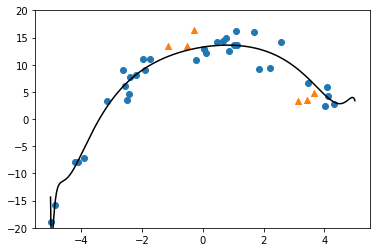

Polynomial coefficients
+-------------+-------------------------+
|     name    |          value          |
+-------------+-------------------------+
| (intercept) |    13.242877632262726   |
|      x      |    0.8742327276129036   |
|     x^2     |   -0.5194425440520498   |
|     x^3     |  0.0060073086464938925  |
|     x^4     |   -0.02161169966964377  |
|     x^5     |  0.0011472313840809882  |
|     x^6     | -0.00039568239266102296 |
|     x^7     |  3.537559873071844e-05  |
|     x^8     | -1.0652607278689033e-07 |
|     x^9     |  5.825198471934891e-07  |
+-------------+-------------------------+
[200 rows x 2 columns]
Note: Only the head of the SFrame is printed.
You can use print_rows(num_rows=m, num_columns=n) to print more rows and columns.


In [16]:
display_results(model_L2_reg)

## Viewing the predictions in the testing set

In [17]:
predictions = test['x', 'y']
predictions['No reg'] = model_no_reg.predict(test)
predictions['L1 reg'] = model_L1_reg.predict(test)
predictions['L2 reg'] = model_L2_reg.predict(test)

In [18]:
predictions

x,y,No reg,L1 reg,L2 reg
-0.2785728454728664,16.36505651355184,10.712104932151867,0.5467437924583817,12.958767791803538
3.6530992777164,4.83366913200435,35.720855227904394,1.2303202834642817,6.45039335199794
-0.5203042856442961,13.47860807272069,12.055259206352734,0.530931865148386,12.644906915280385
3.14466863291336,3.2664703661537313,24.62674826850707,1.0254405801644773,9.082077532784359
-1.1509885402733957,13.436894195835206,21.60866466806543,0.48885372921707737,11.49807964673347
3.424602231401824,3.5269925176080537,6.37982179451501,1.12709924827482,7.701281752205789
